# 911 Calls Data Analysis

911 call data taken from [Kaggle](https://www.kaggle.com/mchirico/montcoalert) and saved in csv file '911.csv'. 

The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

## Data and Setup

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [9]:
emergencyCallData = pd.read_csv('911.csv')

**Information of the Dataframe 'emergencyCallData'**

In [10]:
emergencyCallData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


**The Head of 'emergencyCallData'**

In [11]:
emergencyCallData.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Analysis of Data

**Top 5 Zipcodes from where 911 calls are received**

*Can be used to identify problem areas*

In [12]:
emergencyCallData['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**Top 5 townships from where 911 calls are received**

*Again to identify problem areas*

In [13]:
emergencyCallData['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

**Number of Unique Title Codes**

*To see number of possible causes for emergency calls*

In [25]:
emergencyCallData['title'].nunique()

110

## Reasons for 911 Calls

In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic.

**So I'll create a new field called "Reason" that contains this string value.**

*For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.*

In [26]:
emergencyCallData['reason'] = emergencyCallData['title'].apply(lambda title: title.split(':')[0])

**Reasons for 911 Calls aranged by Most Common**

*Can help understand which departments need more focus and staff*

In [27]:
emergencyCallData['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

**Countplot for 911 Calls by Reason**

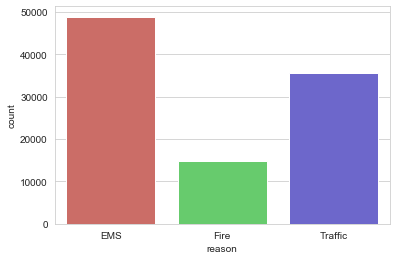

In [28]:
sns.countplot(x='reason',data=emergencyCallData,palette='hls')

## Date and Time Analysis

**Data type of TimeStamp**

In [29]:
type(emergencyCallData['timeStamp'].iloc[0])

str

**Convert the Time Stamps from string to DateTime objects**

*For better analysis of date and time*

In [30]:
emergencyCallData['timeStamp'] = pd.to_datetime(emergencyCallData['timeStamp'])

**Create Fields for Hour, Month, Date and Day of Week**

In [55]:
emergencyCallData['hour'] = emergencyCallData['timeStamp'].apply(lambda time: time.hour)
emergencyCallData['month'] = emergencyCallData['timeStamp'].apply(lambda time: time.month)
emergencyCallData['date'] = emergencyCallData['timeStamp'].apply(lambda time: time.date())
emergencyCallData['day of week'] = emergencyCallData['timeStamp'].apply(lambda time: time.dayofweek)

**Day of Week**

In [33]:
emergencyCallData['day of week']

0        3
1        3
2        3
3        3
4        3
        ..
99487    2
99488    2
99489    2
99490    2
99491    2
Name: day of week, Length: 99492, dtype: int64

*Here we see that day of week is an integer between 0-6*

**Map Day of the Week from Integer to the Name of the Day**

In [62]:
weekDayMap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [63]:
emergencyCallData['day of week'] = emergencyCallData['day of week'].map(weekDayMap)

In [64]:
emergencyCallData['day of week']

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: day of week, Length: 99492, dtype: object

**Countplot for the Day of Week column (with the hue based off of the Reason column)**

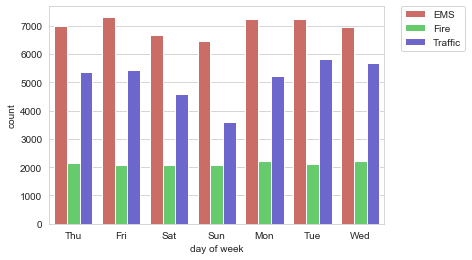

In [44]:
sns.countplot(x='day of week', data=emergencyCallData, hue='reason',palette='hls')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Countplot for the Month column (with the hue based off of the Reason column)**

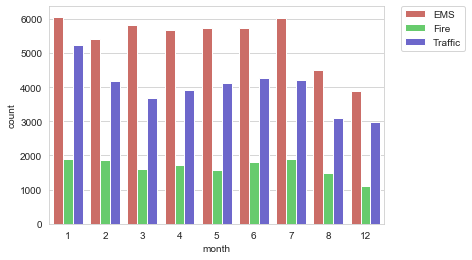

In [43]:
sns.countplot(x='month', data=emergencyCallData, hue='reason',palette='hls')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

*Note that the months 9-11 are missing. Let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months*

**Grouping the Data Frame by month using count() method for aggregation**

In [45]:
byMonth = emergencyCallData.groupby('month').count()

In [46]:
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,day of week
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


**Simple plot off of the dataframe indicating the count of calls per month.**

*Using the e (dummy variable) column*

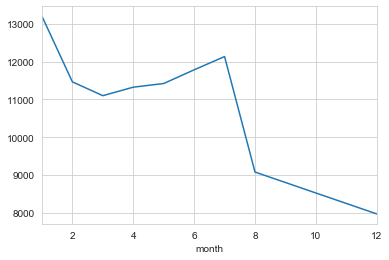

In [47]:
byMonth['e'].plot()

**Linear Fit of Number of Calls per Month**

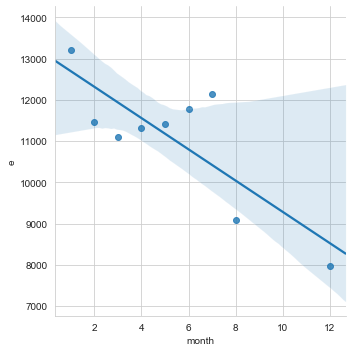

In [49]:
sns.lmplot(x='month',y='e',data=byMonth.reset_index())

**Simple plot off of the dataframe indicating the count of calls by date.**

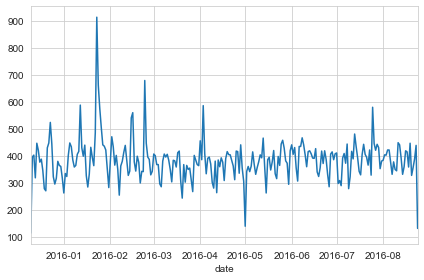

In [57]:
emergencyCallData.groupby('date').count()['e'].plot()
plt.tight_layout()

**Separate plot off of the dataframe indicating the count of calls by date for eachreason**

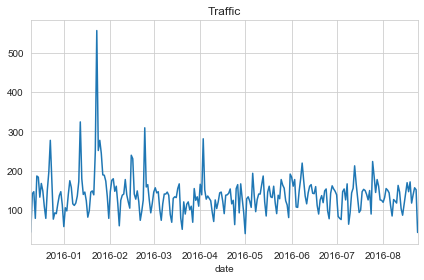

In [58]:
emergencyCallData[emergencyCallData['reason']=='Traffic'].groupby('date').count()['e'].plot()
plt.title('Traffic')
plt.tight_layout()

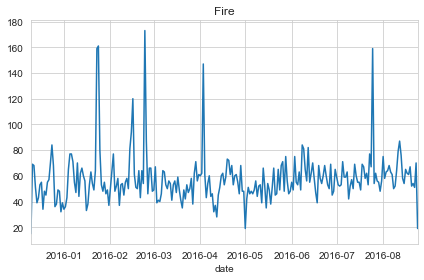

In [59]:
emergencyCallData[emergencyCallData['reason']=='Fire'].groupby('date').count()['e'].plot()
plt.title('Fire')
plt.tight_layout()

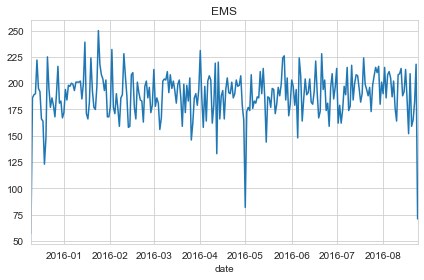

In [60]:
emergencyCallData[emergencyCallData['reason']=='EMS'].groupby('date').count()['e'].plot()
plt.title('EMS')
plt.tight_layout()

## Heatmaps and Clustermaps

**Day of the Week by Hour Data** 

In [70]:
dayHour = emergencyCallData.groupby(by=['day of week','hour']).count()['reason'].unstack()
dayHour

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day of week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


**Day of the Week by Hour Heatmap** 

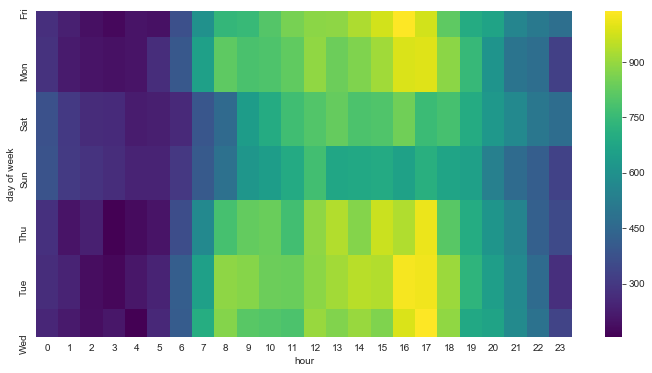

In [71]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

**Day of the Week by Hour Clustermap** 

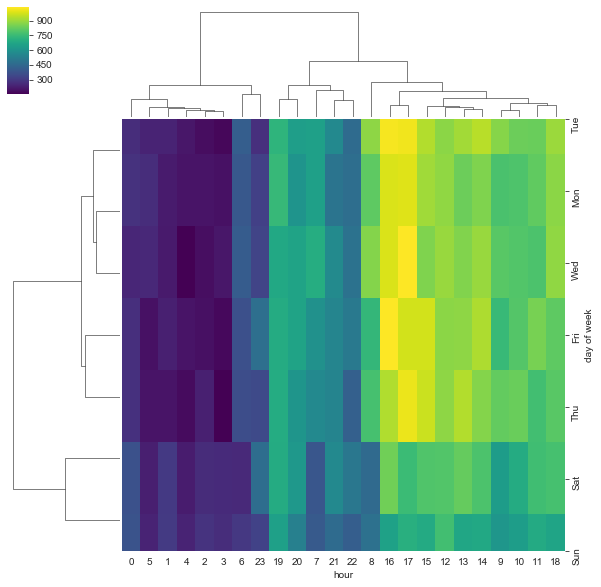

In [72]:
sns.clustermap(dayHour,cmap='viridis')

**Day of the Week by Month Data** 

In [69]:
dayMonth = emergencyCallData.groupby(by=['day of week','month']).count()['reason'].unstack()
dayHour

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day of week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


**Day of the Week by Month Heatmap** 

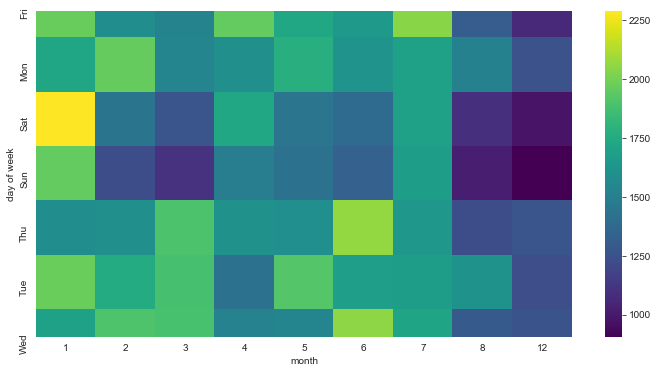

In [73]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

**Day of the Week by Month Clustermap** 

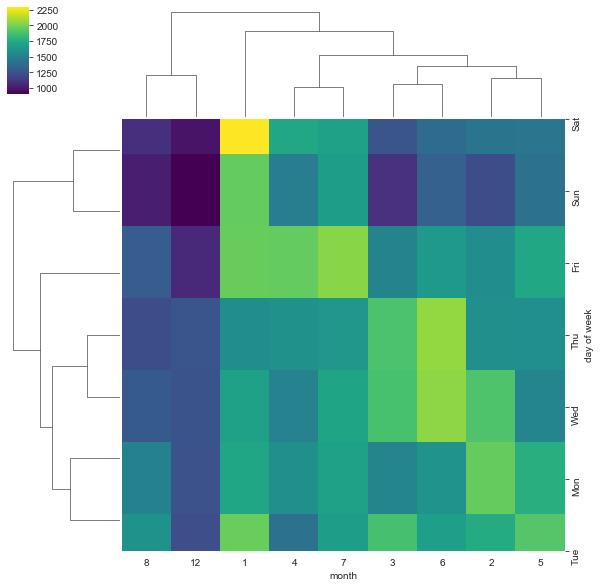

In [74]:
sns.clustermap(dayMonth,cmap='viridis')